In [1]:
import anndata
import numpy as np
import scanpy as sc
import sys
import torch
sys.path.append('../../../../')
import velovae as vv

In [2]:
dataset = 'Erythroid_Human'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/{dataset}_pp.h5ad')
adata.obs['clusters'] = adata.obs['type2'].to_numpy()

In [ ]:
#vv.preprocess(adata, n_gene=2000, min_shared_counts=20)
#adata.write_h5ad(f'data/{dataset}_pp.h5ad')

In [3]:
model_path_base = f'{root}/dcheckpoints/{dataset}'
figure_path_base = f'{root}/dfigures/{dataset}'
data_path = f'{root}/ddata/velovae/continuous/{dataset}'
gene_plot = ['CNN3','CYR61','ABCG2','HBA1']

# VeloVAE

In [4]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             reverse_gene_mode=True)

vae.train(adata, gene_plot=gene_plot, plot=False, figure_path=figure_path)
vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 992 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.66, 0.2137221315308991), (0.34, 0.6793733088533553)
(0.55, 0.7527810779600155), (0.45, 0.3355563953927338)
(0.58, 0.27398700344399946), (0.42, 0.7237131612612386)
KS-test result: [0. 0. 0.]
Initial induction: 1108, repression: 892/2000
Learning Rate based on Data Sparsity: 0.0002
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 197, test iteration: 392
*********       Stage 1: Early Stop Triggered at epoch 283.       *********
*********               

  0%|          | 0/35877 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.030
Average Set Size: 721
*********     Round 1: Early Stop Triggered at epoch 526.    *********
Change in noise variance: 0.8452
*********             Velocity Refinement Round 2             *********
Change in noise variance: 0.0020
Change in x0: 0.0862
*********             Velocity Refinement Round 3             *********
Change in noise variance: 0.0003
Change in x0: 0.0552
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1780.    *********
Change in noise variance: 0.0000
Change in x0: 0.0314
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1918.    *********
Change in noise variance: 0.0000
Change in x0: 0.0347
*********             Velocity Refinement Round 6             *********
Stage 2: Early Stop Triggered at round 5.
*********              Finished. Total Time =   1 h : 39 m : 30 s             

# Full VB

In [5]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True,
                 reverse_gene_mode=True)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 992 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using the steady-state and dynamical models.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

3 clusters detected based on gene co-expression.
(0.66, 0.2137221315308991), (0.34, 0.6793733088533553)
(0.55, 0.7527810779600155), (0.45, 0.3355563953927338)
(0.58, 0.27398700344399946), (0.42, 0.7237131612612386)
KS-test result: [0. 0. 0.]
Initial induction: 1108, repression: 892/2000
Learning Rate based on Data Sparsity: 0.0002
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 197, test iteration: 392
*********       Stage 1: Early Stop Triggered at epoch 108.       *********
*********               

  0%|          | 0/35877 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 719
*********     Round 1: Early Stop Triggered at epoch 298.    *********
Change in noise variance: 0.7028
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 456.    *********
Change in noise variance: 0.0074
Change in x0: 0.0968
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 701.    *********
Change in noise variance: 0.0011
Change in x0: 0.0435
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 765.    *********
Change in noise variance: 0.0003
Change in x0: 0.0284
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 921.    *********
Change in noise variance: 0.0000
Change in x0: 0.0204
*********             Velocity Refinement Round 6   

# Evaluation

In [2]:
root = '/scratch/blaauw_root/blaauw1/gyichen'
dataset = 'Erythroid_Human'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}/{dataset}.h5ad')

In [3]:
Ek = np.median(adata.layers['fullvb_velocity_u']**2 + adata.layers['fullvb_velocity']**2, 0)
gidx = np.argsort(Ek)[-4:]

---   Plotting  Results   ---


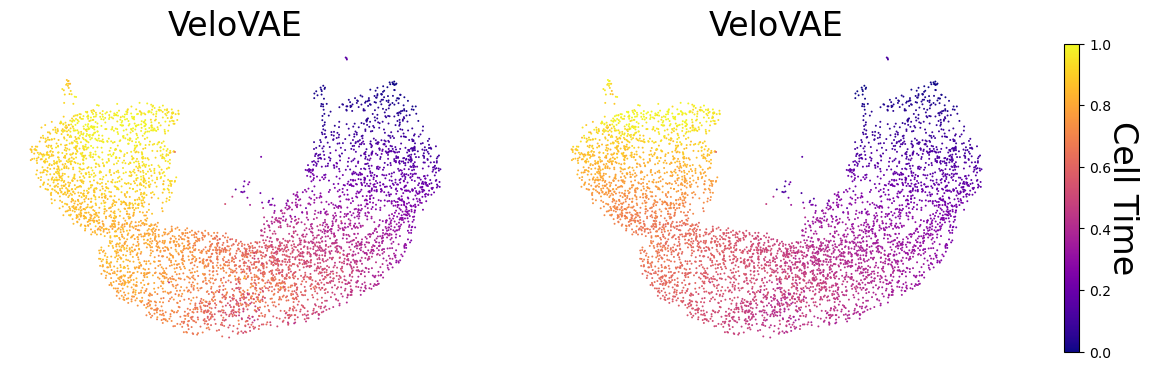

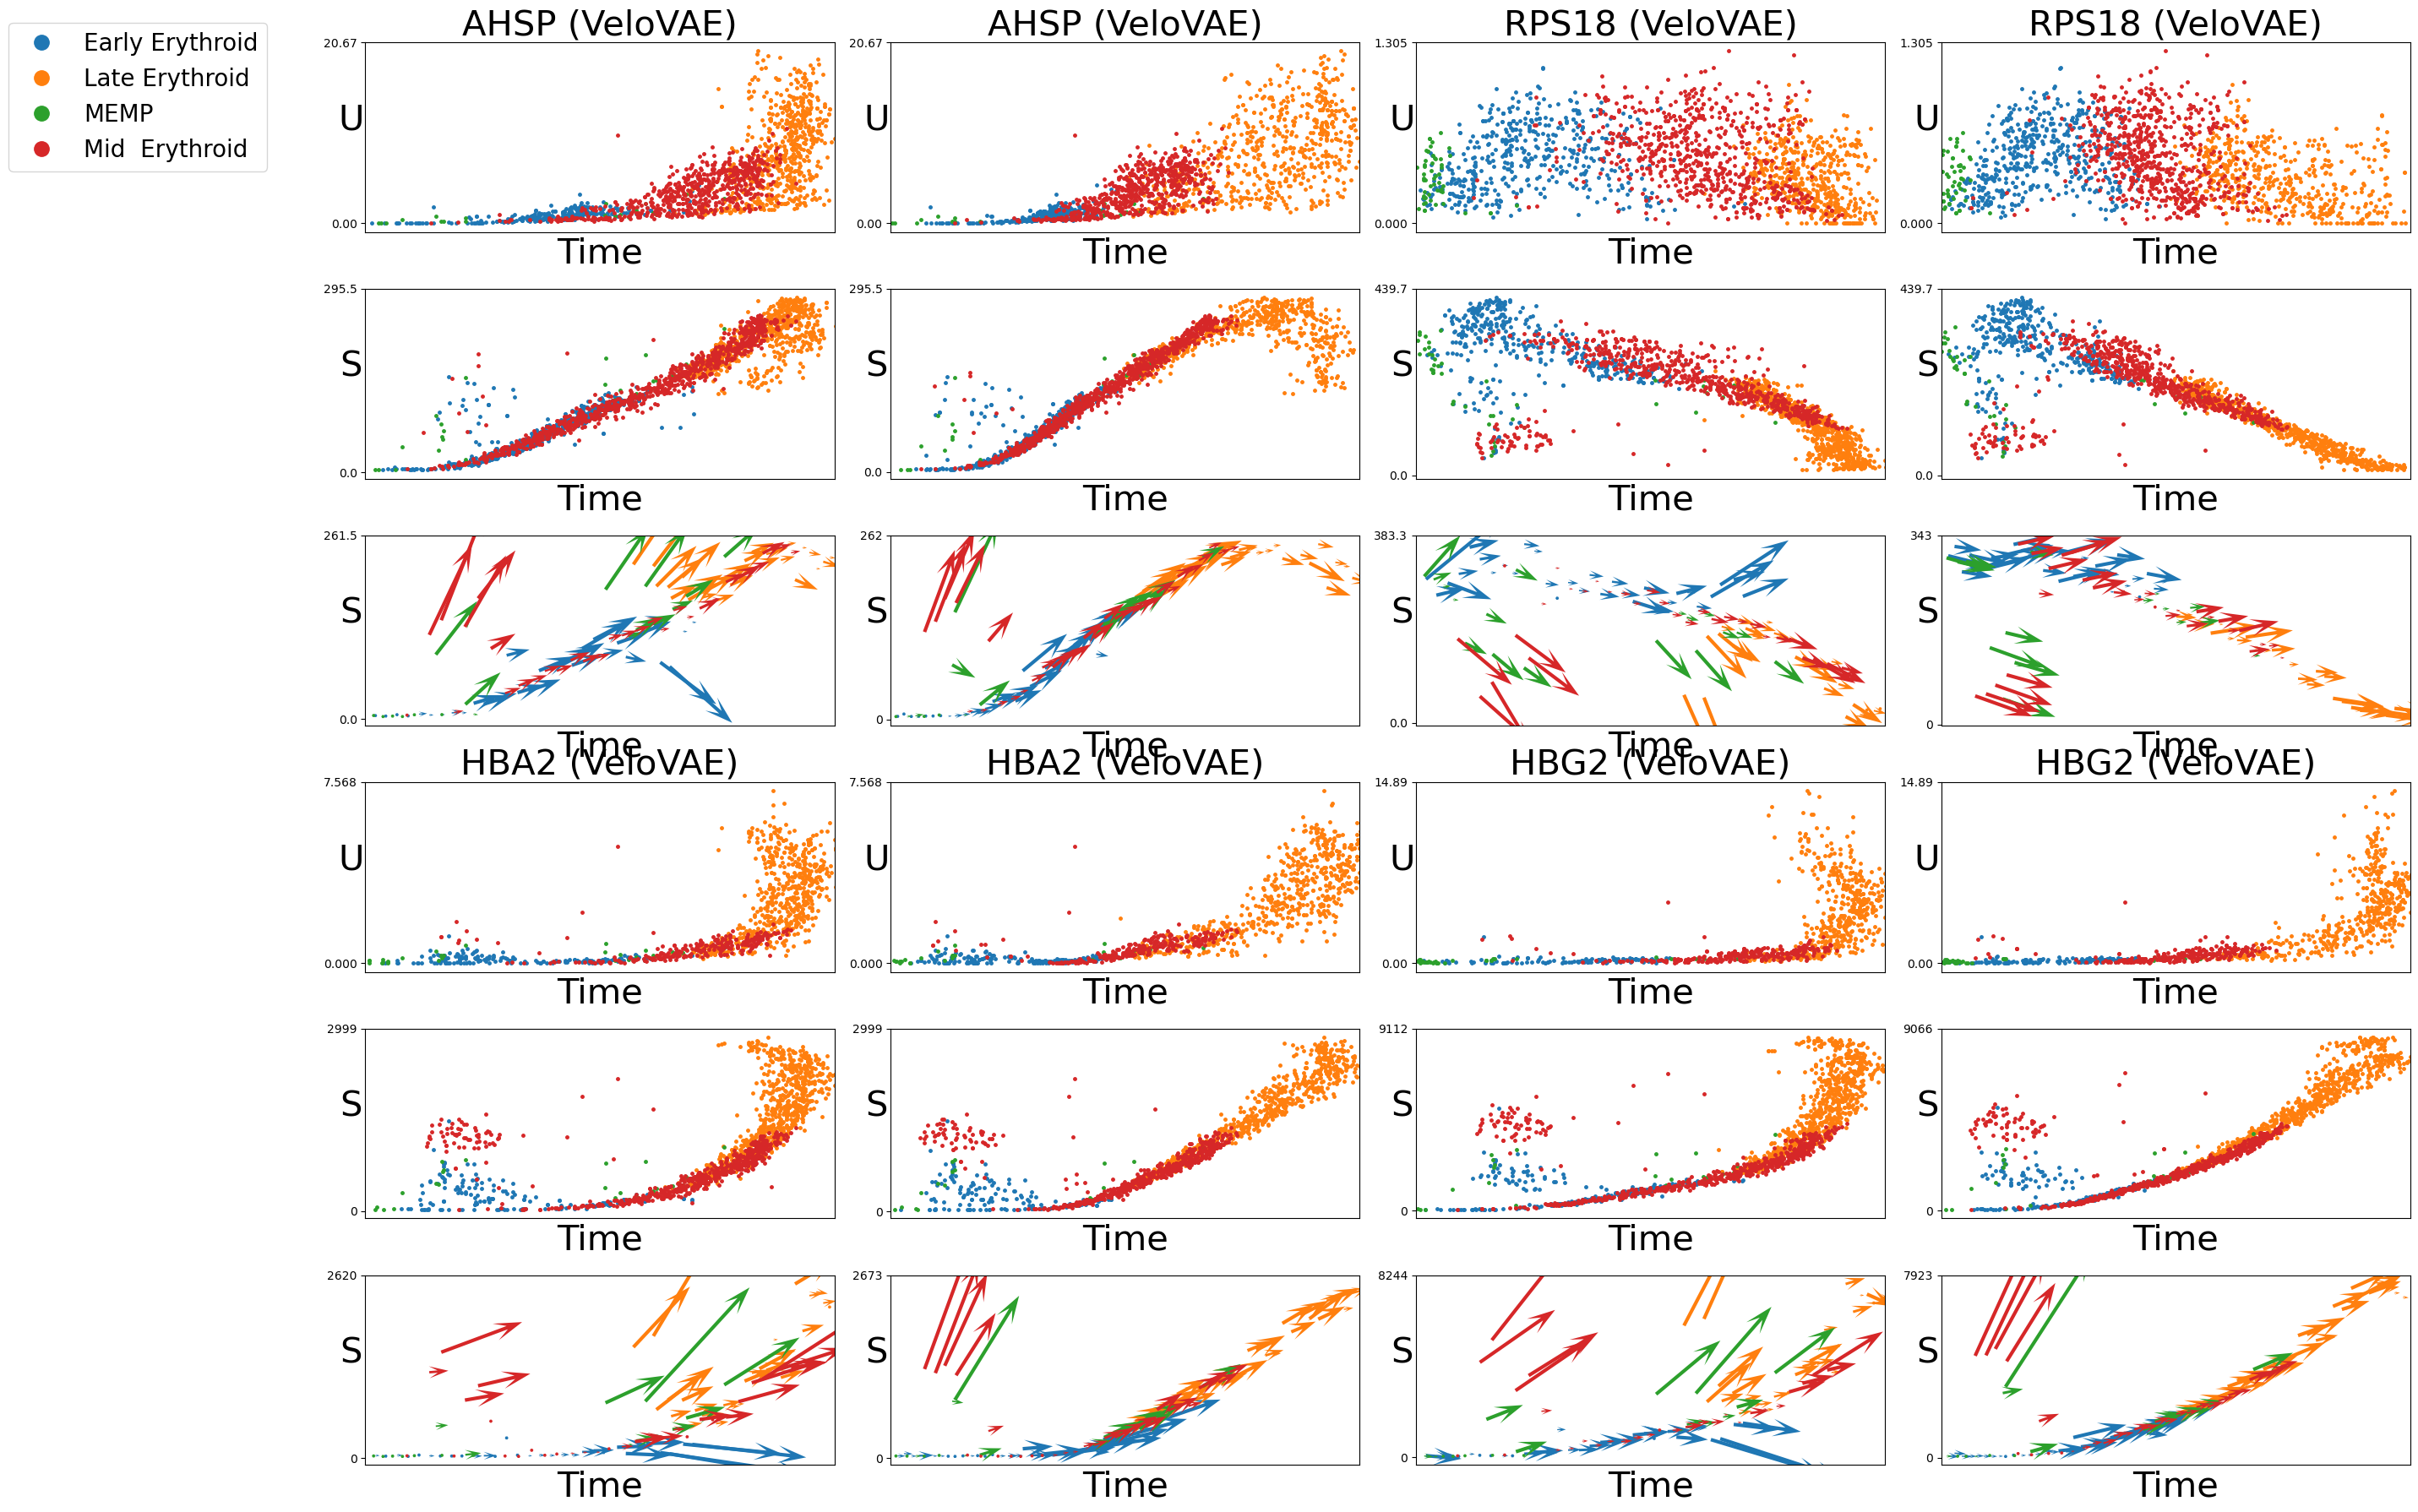

In [4]:
gidx = np.argsort(Ek)[-4:]
gene_plot = adata.var_names[gidx]
res, res_type = vv.post_analysis(adata,
                                 dataset,
                                 ['VeloVAE', 'FullVB'],
                                 ['velovae', 'fullvb'],
                                 compute_metrics=False,
                                 genes=gene_plot,
                                 plot_type=['time', 'gene'],
                                 grid_size=(2,2),
                                 figure_path=f'{root}/figures/{dataset}')

computing velocity graph (using 4/36 cores)


  0%|          | 0/35877 [00:00<?, ?cells/s]

    finished (0:03:25) --> added 
    'fullvb_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:10) --> added
    'fullvb_velocity_umap', embedded velocity vectors (adata.obsm)


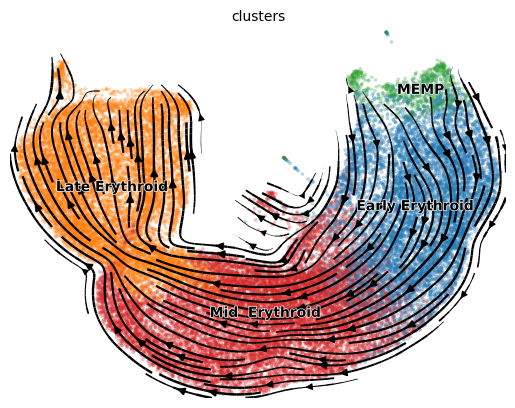

In [5]:
import scvelo as scv
scv.tl.velocity_graph(adata, vkey='fullvb_velocity', n_jobs=4)
scv.pl.velocity_embedding_stream(adata, vkey='fullvb_velocity')